In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as sco
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
# Для отрисовки сетки за графиком
plt.rc('axes', axisbelow=True)
import time
from sklearn.preprocessing import MinMaxScaler as scaler

In [2]:
import matplotlib.cm as cm
import matplotlib.lines as mlines
import seaborn as sns
from tqdm import tqdm_notebook
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='677DPA5KEBSRUU6L', output_format='pandas')

In [3]:
# Подгружаем вероятности за 2016
probas_2016 = pd.read_excel('proba_2016.xlsx')

# Подгружаем вероятности за 2017
probas_2017 = pd.read_excel('proba_2017.xlsx')

# Подгружаем 150 случайных компаний
#naming = pd.read_excel('my_excel_file.xlsx')
#naming = naming.sample(150, random_state = 1)

In [4]:
'''timeseries_150 = pd.DataFrame(columns = ['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', 'label'])

for symbol in tqdm_notebook(naming.Label): 
    data_1, _ = ts.get_weekly_adjusted(symbol = symbol)
    data_1 = pd.DataFrame(data_1)
    data_1.sort_index(inplace = True)
    data = data_1[['5. adjusted close']]
    data = data.rename(columns = {'5. adjusted close':'price'})
    data['label'] = symbol
    timeseries_150 = pd.concat([timeseries_150,data])
    
    time.sleep(12)
    
timeseries_150.to_excel('priciki_150.xlsx')'''

"timeseries_150 = pd.DataFrame(columns = ['1. open', '2. high', '3. low', '4. close', '5. adjusted close',\n       '6. volume', '7. dividend amount', 'label'])\n\nfor symbol in tqdm_notebook(naming.Label): \n    data_1, _ = ts.get_weekly_adjusted(symbol = symbol)\n    data_1 = pd.DataFrame(data_1)\n    data_1.sort_index(inplace = True)\n    data = data_1[['5. adjusted close']]\n    data = data.rename(columns = {'5. adjusted close':'price'})\n    data['label'] = symbol\n    timeseries_150 = pd.concat([timeseries_150,data])\n    \n    time.sleep(12)\n    \ntimeseries_150.to_excel('priciki_150.xlsx')"

In [5]:
'''timeseries_2016 = pd.DataFrame(columns = ['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', 'label'])

for symbol in tqdm_notebook(probas_2016.label): 
    data_1, _ = ts.get_weekly_adjusted(symbol = symbol)
    data_1 = pd.DataFrame(data_1)
    data_1.sort_index(inplace = True)
    data = data_1[['5. adjusted close']]
    data = data.rename(columns = {'5. adjusted close':'price'})
    data['label'] = symbol
    timeseries_2016 = pd.concat([timeseries_2016,data])
    
    time.sleep(12)
    
timeseries_2016.to_excel('priciki_2016.xlsx')'''

"timeseries_2016 = pd.DataFrame(columns = ['1. open', '2. high', '3. low', '4. close', '5. adjusted close',\n       '6. volume', '7. dividend amount', 'label'])\n\nfor symbol in tqdm_notebook(probas_2016.label): \n    data_1, _ = ts.get_weekly_adjusted(symbol = symbol)\n    data_1 = pd.DataFrame(data_1)\n    data_1.sort_index(inplace = True)\n    data = data_1[['5. adjusted close']]\n    data = data.rename(columns = {'5. adjusted close':'price'})\n    data['label'] = symbol\n    timeseries_2016 = pd.concat([timeseries_2016,data])\n    \n    time.sleep(12)\n    \ntimeseries_2016.to_excel('priciki_2016.xlsx')"

In [6]:
'''timeseries_2017 = pd.DataFrame(columns = ['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', 'label'])

for symbol in tqdm_notebook(probas_2017.label): 
    data_1, _ = ts.get_weekly_adjusted(symbol = symbol)
    data_1 = pd.DataFrame(data_1)
    data_1.sort_index(inplace = True)
    data = data_1[['5. adjusted close']]
    data = data.rename(columns = {'5. adjusted close':'price'})
    data['label'] = symbol
    timeseries_2017 = pd.concat([timeseries_2017,data])
    
    time.sleep(12)
    
timeseries_2017.to_excel('priciki_2017.xlsx')'''

"timeseries_2017 = pd.DataFrame(columns = ['1. open', '2. high', '3. low', '4. close', '5. adjusted close',\n       '6. volume', '7. dividend amount', 'label'])\n\nfor symbol in tqdm_notebook(probas_2017.label): \n    data_1, _ = ts.get_weekly_adjusted(symbol = symbol)\n    data_1 = pd.DataFrame(data_1)\n    data_1.sort_index(inplace = True)\n    data = data_1[['5. adjusted close']]\n    data = data.rename(columns = {'5. adjusted close':'price'})\n    data['label'] = symbol\n    timeseries_2017 = pd.concat([timeseries_2017,data])\n    \n    time.sleep(12)\n    \ntimeseries_2017.to_excel('priciki_2017.xlsx')"

In [7]:
timeseries_150 = pd.read_excel('priciki_150.xlsx')
timeseries_150 = timeseries_150.iloc[:, [0,8,9]]
timeseries_150.rename(columns = {'Unnamed: 0': 'DataDate'}, inplace = True)

In [8]:
timeseries_2016 = pd.read_excel('priciki_2016.xlsx')
timeseries_2016 = timeseries_2016.iloc[:, [0,8,9]]
timeseries_2016.rename(columns = {'Unnamed: 0': 'DataDate'}, inplace = True)

In [9]:
timeseries_2017 = pd.read_excel('priciki_2017.xlsx')
timeseries_2017 = timeseries_2017.iloc[:, [0,8,9]]
timeseries_2017.rename(columns = {'Unnamed: 0': 'DataDate'}, inplace = True)

In [10]:
# Рассчитываем доходности для компаний

df_150 = pd.DataFrame()
df_150 = timeseries_150
df_150['delta'] = df_150.groupby('label')['price'].pct_change()

df_2016 = pd.DataFrame()
df_2016 = timeseries_2016
df_2016['delta'] = df_2016.groupby('label')['price'].pct_change()

df_2017 = pd.DataFrame()
df_2017 = timeseries_2017
df_2017['delta'] = df_2017.groupby('label')['price'].pct_change()

In [11]:
# Создаем пивот тейбл 150
Assets_table_150 = df_150.pivot_table(
                  index='DataDate', 
                  columns='label', 
                  values='delta').applymap(float)
Assets_table_150 = Assets_table_150[Assets_table_150.index.year > 2012]

# Создаем пивот тейбл 2016
Assets_table_2016 = df_2016.pivot_table(
                  index='DataDate', 
                  columns='label', 
                  values='delta').applymap(float)
Assets_table_2016 = Assets_table_2016[Assets_table_2016.index.year > 2012]

# Создаем пивот тейбл 2017
Assets_table_2017 = df_2017.pivot_table(
                  index='DataDate', 
                  columns='label', 
                  values='delta').applymap(float)
Assets_table_2017 = Assets_table_2017[Assets_table_2017.index.year > 2012]

In [12]:
#Assets_table = Assets_table.reset_index()
#Assets_table['NAN'] = Assets_table.isnull().sum(axis = 1)
#Assets_table['Year'] = Assets_table['DataDate'].dt.year

#ax = Assets_table.groupby('Year')['NAN'].sum().plot(kind='bar', color='#86bf91', 
#                            zorder=2, figsize = (20,5)) 
#plt.xticks(np.arange(len(Assets_table.Year.drop_duplicates())), 
#           Assets_table.Year.drop_duplicates(), rotation=90)
#plt.show()

#Assets_table.set_index(['DataDate'], inplace = True)
#Assets_table = Assets_table.drop(['NAN', 'Year', ], axis=1)

In [13]:
# Заполняем NA
Assets_table_150.fillna(method='ffill', inplace=True)
Assets_table_150.fillna(method='bfill', inplace=True)

Assets_table_2016.fillna(method='ffill', inplace=True)
Assets_table_2016.fillna(method='bfill', inplace=True)

Assets_table_2017.fillna(method='ffill', inplace=True)
Assets_table_2017.fillna(method='bfill', inplace=True)

## Граница эффективности

Моделирование совокупности инвестиционных портфелей графически представляется в форме «пули», верхняя линия которой является эффективной границей. Точки, лежащие на ней, представляют собой портфели с наименьшим уровнем риска для заданной доходности. Остальные точки, находящиеся правее соответсвуют большему риску при том же показатели ожидаемой доходности

Построение эффективной границы предполагает нахождение двух крайних точек (минимального риска и максимальной доходности с учетом показателя риска). Для этого используем Scipy's optimize function как альтернативу перебору всех возможных вариантов сформированных портфелей. Scipy's optimize function сходна с функцией 'Поиск решения' в Excel, выполняет те же функции, при указании того, что нужно оптимизировать и какие при этом есть ограничения (constraints) и границы (bounds).

Ниже приведены функции для получения портфеля с наибольшим коэффициентом Шарпа. Данный показатель отражает во сколько раз уровень доходности выше уровня риска. Он указывает на стабильность прибыли, при этом отображая и ее количественную характеристику.

Поскольку в Scipy's optimize function отсутствует «максимизация» в качестве целевой функции должно быть выбрано то, что следует минимизировать. Поэтому "neg_sharpe_ratio" вычисляет отрицательный коэффициент Шарпа.

В функции "max_sharpe_ratio" сначала определяются аргументы (они не должны включать, те значения, которые будут изменяться в ходе оптимизации, в частности доли акций -"weights")

Поскольку доли акций в портфеле суммарно не должны превышать 1 (нельзя превысить бюджет более чем на 100 %) то: constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) Данное ограничение говорит о том, что сумма x должна быть равна 1.

Для лучшего понимания можно рассматривать данное условие как перенос 1 в левую сторону равенства: 'np.sum(x) == 1' has become 'np.sum(x)-1'

Границы задают другое ограничения для долей акции – они должны лежать в интервале от 0 до 1. Ведь нельзя задать отрицательное распределение ровно, как и превысить 100% показатель.

In [14]:
# Проводим упорядочивание рядов
Assets_table_2016 = Assets_table_2016.loc[:,probas_2016.label]
Assets_table_2017 = Assets_table_2017.loc[:,probas_2017.label]

In [15]:
drop_2016 = pd.DataFrame(Assets_table_2016[Assets_table_2016.index.year < 2016].mean().reset_index())
drop_2017 = pd.DataFrame(Assets_table_2017.mean().reset_index())
drop_2017 = drop_2017[drop_2017.iloc[:, 1] < 0]
drop_2016 = drop_2016[drop_2016.iloc[:, 1] < 0]
Assets_table_2017.drop(columns = (drop_2017.label), inplace = True)
Assets_table_2016.drop(columns = (drop_2016.label), inplace = True)
probas_2017 = probas_2017[probas_2017.label != list(drop_2017.label)[0]]
probas_2016 = probas_2016[probas_2016.label != list(drop_2016.label)[0]]
probas_2016 = probas_2016[probas_2016.label != list(drop_2016.label)[1]]
probas_2016 = probas_2016[probas_2016.label != list(drop_2016.label)[2]]
probas_2016 = probas_2016[probas_2016.label != list(drop_2016.label)[3]]

In [16]:
mean_2016 = np.array(Assets_table_2016[Assets_table_2016.index.year < 2016].mean()) * 48
proba_2016 = np.array(probas_2016.loc[:, 'Prob_1'])

mean_2017 = np.array(Assets_table_2017[Assets_table_2017.index.year < 2017].mean()) * 48
proba_2017 = np.array(probas_2017.loc[:, 'Prob_1'])

sc_mean = scaler(feature_range=(0.5,1))
sc_proba = scaler(feature_range=(0.5,1))

mean_2016_sc = sc_mean.fit_transform(mean_2016.reshape(-1,1)).reshape(1,-1)[0]
proba_2016_sc = sc_proba.fit_transform(proba_2016.reshape(-1,1)).reshape(1,-1)[0]
garmon_2016_sc =  ((1 + 1) * mean_2016_sc * proba_2016_sc) / (mean_2016_sc + proba_2016_sc)
garmon_2016 = ((1 + 1) * mean_2016 * proba_2016) / (mean_2016 + proba_2016)
print('mean_2016_sc', np.around(mean_2016,3), '\n')
print('mean_2016_sc', np.around(mean_2016_sc,3), '\n')
print('garmon_2016_sc', np.around(garmon_2016_sc,3), '\n')
print('garmon_2016', np.around(garmon_2016,3), '\n')


mean_2017_sc = sc_mean.fit_transform(mean_2017.reshape(-1,1)).reshape(1,-1)[0]
proba_2017_sc = sc_proba.fit_transform(proba_2017.reshape(-1,1)).reshape(1,-1)[0]
garmon_2017_sc =  ((1 + 1) * mean_2017_sc * proba_2017_sc) / (mean_2017_sc + proba_2017_sc)
garmon_2017 = ((1 + 1) * mean_2017 * proba_2017) / (mean_2017 + proba_2017 )
print('mean_2016_sc', np.around(mean_2017,3), '\n')
print('garmon_2017_sc', np.around(garmon_2017_sc, 3), '\n')
print('garmon_2017', np.around(garmon_2017, 3), '\n')

mean_2016_sc [0.187 0.134 0.188 0.144 0.027 0.7   0.221 0.267 0.061 0.154 0.191 0.238
 0.112 0.017 0.095 0.463 0.23  0.283 0.075 0.194 0.074] 

mean_2016_sc [0.625 0.586 0.625 0.593 0.508 1.    0.649 0.683 0.532 0.6   0.628 0.662
 0.57  0.5   0.557 0.827 0.656 0.695 0.543 0.629 0.541] 

garmon_2016_sc [0.769 0.725 0.754 0.723 0.648 0.943 0.741 0.752 0.648 0.667 0.68  0.695
 0.635 0.589 0.624 0.757 0.664 0.683 0.59  0.616 0.52 ] 

garmon_2016 [0.298 0.226 0.297 0.24  0.053 0.704 0.336 0.386 0.112 0.251 0.299 0.353
 0.192 0.033 0.167 0.549 0.343 0.397 0.136 0.299 0.132] 

mean_2016_sc [0.199 0.24  0.245 0.287 0.197 0.167 0.533 0.212 0.169 0.213 0.18  0.043
 0.066 0.185 0.24  0.165 0.184 0.085 0.379 0.276 0.171 0.118 0.075] 

garmon_2017_sc [0.794 0.803 0.802 0.796 0.737 0.705 0.873 0.711 0.668 0.687 0.662 0.559
 0.568 0.629 0.647 0.61  0.609 0.559 0.673 0.634 0.581 0.537 0.516] 

garmon_2017 [0.306 0.351 0.356 0.394 0.3   0.264 0.572 0.315 0.264 0.315 0.277 0.081
 0.118 0.281 0.339 0.257

In [17]:
# Рассчитываем ожидаемый ретерн и матрицу ковариации доходностей для 2016
probability_2016 = garmon_2016_sc 
cov_matrix_2016 = Assets_table_2016.cov()
num_periods_annually = 48 # Количество месяцев в году

# Рассчитываем ожидаемый ретерн и матрицу ковариации доходностей для 2017
probability_2017 = garmon_2017_sc 
cov_matrix_2017 = Assets_table_2017.cov()
num_periods_annually = 48 # Количество месяцев в году

In [18]:
a_rsk_2016 = np.std(Assets_table_2016) * np.sqrt(num_periods_annually)
a_ret_2016 = garmon_2016_sc

a_rsk_2017 = np.std(Assets_table_2017) * np.sqrt(num_periods_annually)
a_ret_2017 = garmon_2017_sc

-------------------------------------------------------------------------------------------------------------------------
#### Функция вычисления риска по конкретному портфелю 

In [19]:
def PAP(weights, probability, cov_matrix):
    #portfolio_annualised_performance
    p_proba = np.sum(probability*weights )
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(num_periods_annually)
    return std, p_proba

-------------------------------------------------------------------------------------------------------------------------
#### Функция максимизация коэффициента шарпа

In [20]:
def max_sharpe_ratio(probability, cov_matrix):
    
    def neg_sharpe_ratio(weights, probability, cov_matrix):
        p_var, p_proba = PAP(weights, probability, cov_matrix)
        return -(p_proba) / p_var

    num_assets = len(probability)
    args = (probability, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

-------------------------------------------------------------------------------------------------------------------------
#### Функция максимизация доходности портфеля

In [21]:
def max_return(probability, cov_matrix):
    
    def neg_portfolio_return(weights, probability, cov_matrix):
        return -1*PAP(weights, probability, cov_matrix)[1]
    
    num_assets = len(probability)
    args = (probability, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(neg_portfolio_return, num_assets*[1./num_assets,], args=args,
                          method='SLSQP', bounds=bounds, constraints=constraints)

    return result

-------------------------------------------------------------------------------------------------------------------------
#### Функция минимизации риска портфеля

In [22]:
def portfolio_volatility(weights, probability, cov_matrix):
    return PAP(weights, probability, cov_matrix)[0]

def min_variance(probability, cov_matrix):
    num_assets = len(probability)
    args = (probability, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                          method='SLSQP', bounds=bounds, constraints=constraints)

    return result

-------------------------------------------------------------------------------------------------------------------------
#### Функция поиска эффективной границы

Как уже упоминалось выше эффективная граница — это линия, которая отражает, где находятся эффективные портфели для заданного уровня риска. Ниже приведены функции для ее вычисления. 

Первая - "efficient_return" вычисляет самый эффективный портфель для заданной доходности. Т.е. мы устанавливаем таргет значение доходности, которой портфель должен достигать, и получаем для нее эффективное значение риска.

Вторая - "efficient_frontier" принимает диапазон таргет доходностей и вычисляет эффективный риск для каждой из них.

In [23]:
def efficient_return(probability, cov_matrix, target):
    num_assets = len(probability)
    args = (probability, cov_matrix)

    def portfolio_return(weights):
        return PAP(weights, probability, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                          method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def efficient_frontier(probability, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(probability, cov_matrix, ret))
    return efficients

-------------------------------------------------------------------------------------------------------------------------
#### Функция генерации рандомных портфелей

Построим портфель с максимальным коэффициентом Шарпа и минимальным риском, а также отразим все случайно сгенерированные портфели. При этом мы не выбираем оптимальные портфели из случайно сгенерированных, а вычисляем их, используя Scipy's 'minimize' function. Приведенная ниже функция также строит границу эффективности.

In [24]:
def random_portfolios(num_portfolios, probability, cov_matrix):
    results = np.zeros((len(Assets_table.columns),num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(Assets_table.columns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_proba = PAP(weights, probability, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_proba
        results[2,i] = (portfolio_proba) / portfolio_std_dev
    return results, weights_record

Оптимизируем. Ищем портфель с максимальным коэффициентом шарпа (max_sharpe), минимальным риском (min_vol), максимальной доходностью.

Сохраняем доли акций в портфеле в переменные max_sharpe_allocation, min_vol_allocation, max_ret_allocation

In [25]:
%%time
# Портфели для 2016
max_sharpe_res_2016 = max_sharpe_ratio(probability_2016, cov_matrix_2016)['x']
min_var_res_2016 = min_variance(probability_2016, cov_matrix_2016)['x']
max_ret_res_2016 = max_return(probability_2016, cov_matrix_2016)['x']

sharpe_std_2016, sharpe_ret_2016 = PAP(max_sharpe_res_2016, probability_2016, cov_matrix_2016)
min_std_2016, min_ret_2016 = PAP(min_var_res_2016, probability_2016, cov_matrix_2016)
max_std_2016, max_ret_2016 = PAP(max_ret_res_2016, probability_2016, cov_matrix_2016)

# Портфели для 2017
max_sharpe_res_2017 = max_sharpe_ratio(probability_2017, cov_matrix_2017)['x']
min_var_res_2017 = min_variance(probability_2017, cov_matrix_2017)['x']
max_ret_res_2017 = max_return(probability_2017, cov_matrix_2017)['x']

sharpe_std_2017, sharpe_ret_2017 = PAP(max_sharpe_res_2017, probability_2017, cov_matrix_2017)
min_std_2017, min_ret_2017 = PAP(min_var_res_2017, probability_2017, cov_matrix_2017)
max_std_2017, max_ret_2017 = PAP(max_ret_res_2017, probability_2017, cov_matrix_2017)

Wall time: 191 ms


In [26]:
# 2016
sharpe_std_2016, sharpe_ret_2016 = PAP(max_sharpe_res_2016, probability_2016, cov_matrix_2016)
max_sharpe_allocation_2016 = pd.DataFrame(max_sharpe_res_2016,index=Assets_table_2016.columns,columns=['allocation'])
max_sharpe_allocation_2016.allocation = [round(i*100,2)for i in max_sharpe_allocation_2016.allocation]
max_sharpe_allocation_2016 = max_sharpe_allocation_2016.T

min_std_2016, min_ret_2016 = PAP(min_var_res_2016, probability_2016, cov_matrix_2016)
min_vol_allocation_2016 = pd.DataFrame(min_var_res_2016,index=Assets_table_2016.columns,columns=['allocation'])
min_vol_allocation_2016.allocation = [round(i*100,2)for i in min_vol_allocation_2016.allocation]
min_vol_allocation_2016 = min_vol_allocation_2016.T

max_std_2016, max_ret_2016 = PAP(max_ret_res_2016, probability_2016, cov_matrix_2016)
max_ret_allocation_2016 = pd.DataFrame(max_ret_res_2016,index=Assets_table_2016.columns,columns=['allocation'])
max_ret_allocation_2016.allocation = [round(i*100,2)for i in max_ret_allocation_2016.allocation]
max_ret_allocation_2016 = max_ret_allocation_2016.T

# 2017
sharpe_std_2017, sharpe_ret_2017 = PAP(max_sharpe_res_2017, probability_2017, cov_matrix_2017)
max_sharpe_allocation_2017 = pd.DataFrame(max_sharpe_res_2017,index=Assets_table_2017.columns,columns=['allocation'])
max_sharpe_allocation_2017.allocation = [round(i*100,2)for i in max_sharpe_allocation_2017.allocation]
max_sharpe_allocation_2017 = max_sharpe_allocation_2017.T

min_std_2017, min_ret_2017 = PAP(min_var_res_2017, probability_2017, cov_matrix_2017)
min_vol_allocation_2017 = pd.DataFrame(min_var_res_2017,index=Assets_table_2017.columns,columns=['allocation'])
min_vol_allocation_2017.allocation = [round(i*100,2)for i in min_vol_allocation_2017.allocation]
min_vol_allocation_2017 = min_vol_allocation_2017.T

max_std_2017, max_ret_2017 = PAP(max_ret_res_2017, probability_2017, cov_matrix_2017)
max_ret_allocation_2017 = pd.DataFrame(max_ret_res_2017,index=Assets_table_2017.columns,columns=['allocation'])
max_ret_allocation_2017.allocation = [round(i*100,2)for i in max_ret_allocation_2017.allocation]
max_ret_allocation_2017 = max_ret_allocation_2017.T

Находим (оптимизируем) эффективную границу портфелей

In [27]:
%%time
target_2016 = np.linspace(min_ret_2016, max_ret_2016, 20)
efficient_portfolios_2016 = efficient_frontier(probability_2016, cov_matrix_2016, target_2016)

target_2017 = np.linspace(min_ret_2017, max_ret_2017, 20)
efficient_portfolios_2017 = efficient_frontier(probability_2017, cov_matrix_2017, target_2017)

Wall time: 2.11 s


Преобразуем оптимизированные параметры для нормального отображения при использовании print

Генерируем (метод Монте Карло) num_portfolios случайных портфелей для отрисовки их на графике

In [28]:
# results, _ = random_portfolios(num_portfolios,probability, cov_matrix)

#plt.figure(figsize=(10, 7))
#plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
#plt.colorbar(label='Коэффициент Шарпа')
#plt.scatter(sharpe_std,sharpe_ret,marker='*',color='r',s=500, label='Максимальный коэф-т Шарпа')
#plt.scatter(min_std,min_ret,marker='*',color='g',s=500, label='Минимальный риск')
#plt.scatter(max_std,max_ret,marker='*',color='b',s=500, label='Максимальная доходность')


#plt.plot([p['fun'] for p in efficient_portfolios], target, 'k-x', label='граница эффективности')
#plt.title('Оптимизация портфеля на основе построения эффективной границы')
#plt.xlabel('Риск(стандартное отклонение)')
#plt.ylabel('Доходность')
#plt.grid(True, linestyle='--')
#plt.legend(labelspacing=0.8)

#plt.tight_layout();

--------------------------------------------------------------------------------
Распределение долей акций в портфеле с максимальным коэффициентом Шарпа:

Годовая доходность: 0.686
Годовой риск: 0.152
Коэффициент Шарпа 4.528


--------------------------------------------------------------------------------
Распределение долей акций в портфеле с наименьшим показателем риска:

Годовая доходность: 0.627
Годовой риск: 0.145
Коэффициент Шарпа: 4.34


--------------------------------------------------------------------------------
Распределение долей акций в портфеле с наименьшим показателем риска:

Годовая доходность: 0.943
Годовой риск: 0.446
Коэффициент Шарпа: 2.116




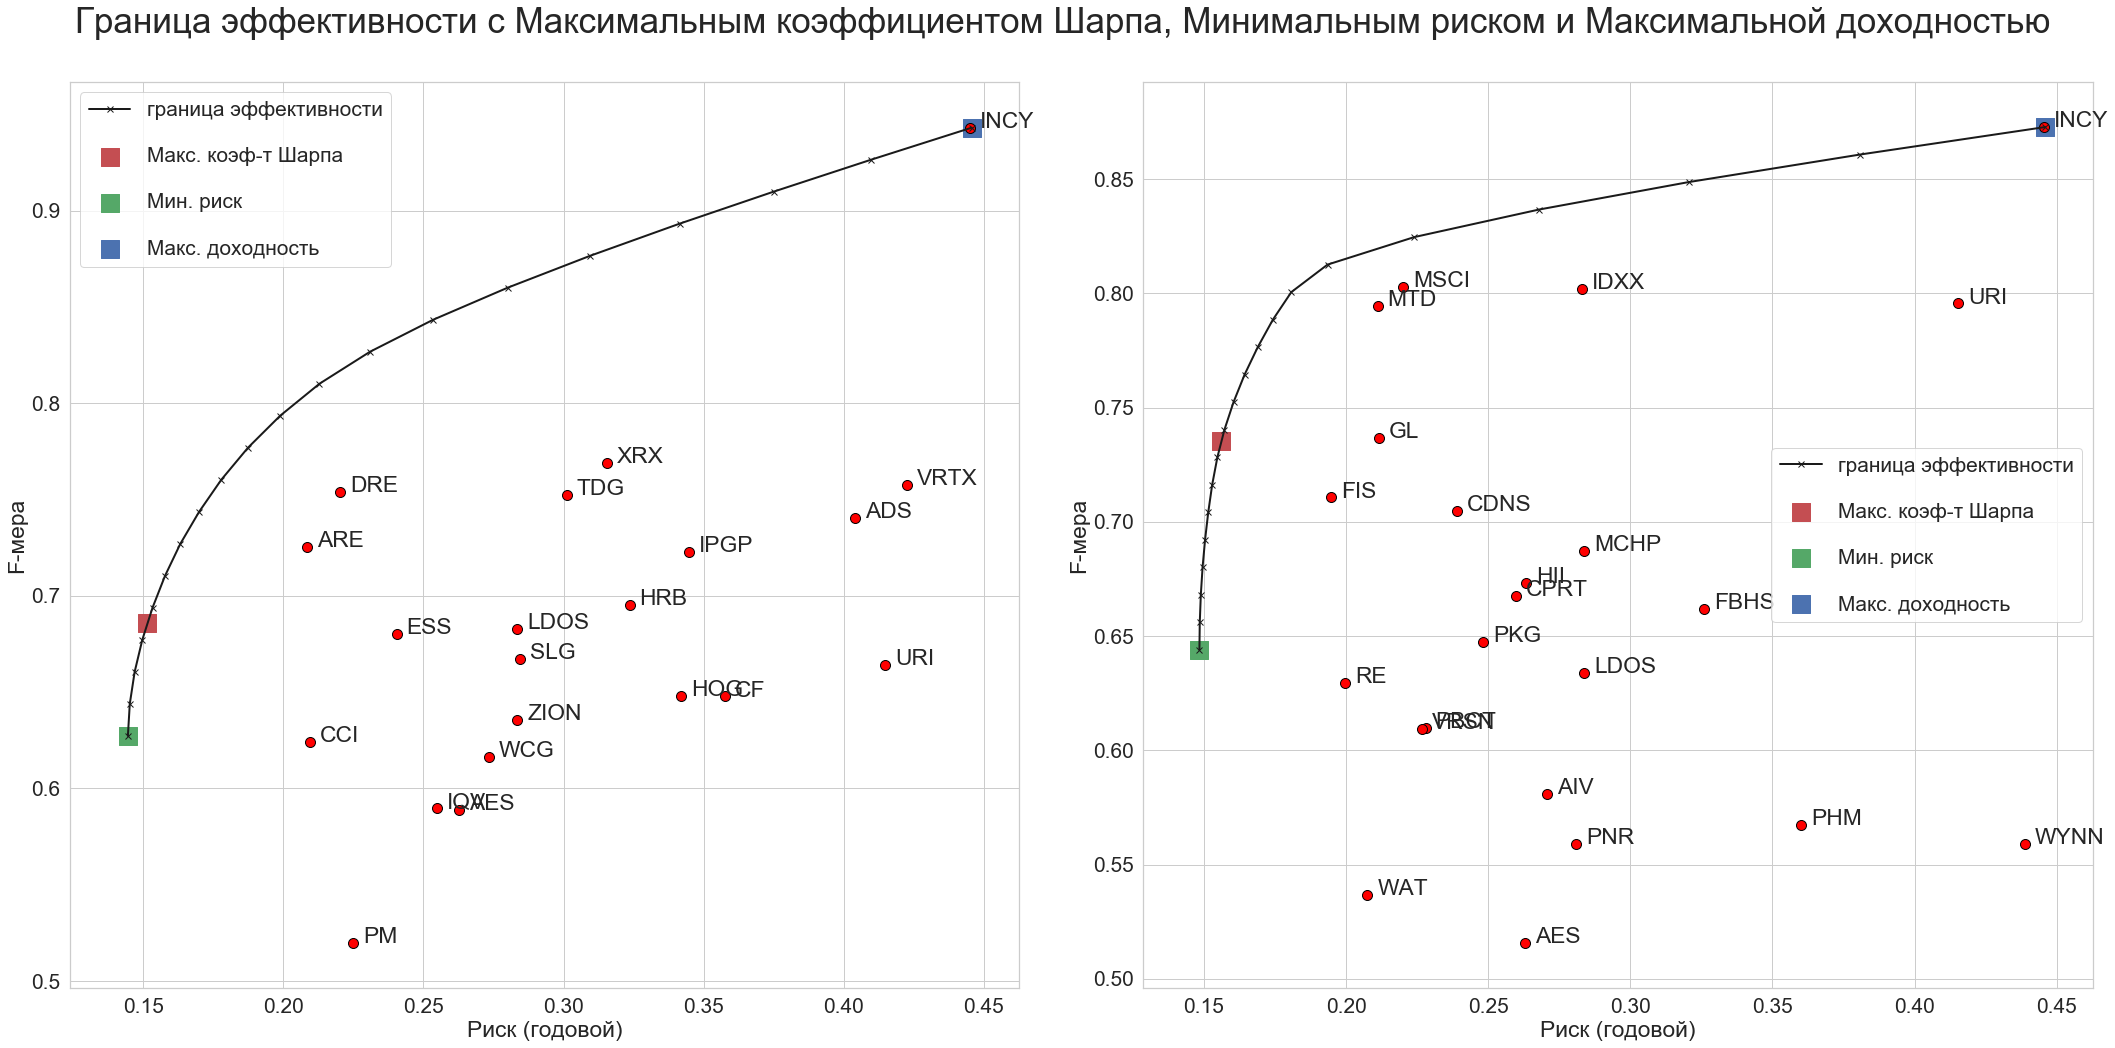

In [29]:
print("-"*80)
print("Распределение долей акций в портфеле с максимальным коэффициентом Шарпа:\n")
print("Годовая доходность:", round(sharpe_ret_2016,3))
print("Годовой риск:", round(sharpe_std_2016,3))
print("Коэффициент Шарпа", round((sharpe_ret_2016)/sharpe_std_2016, 3))
print("\n")

print("-"*80)
print("Распределение долей акций в портфеле с наименьшим показателем риска:\n")
print("Годовая доходность:", round(min_ret_2016,3))
print("Годовой риск:", round(min_std_2016,3))
print("Коэффициент Шарпа:", round((min_ret_2016)/min_std_2016, 3))
print("\n")

print("-"*80)
print("Распределение долей акций в портфеле с наименьшим показателем риска:\n")
print("Годовая доходность:", round(max_ret_2016,3))
print("Годовой риск:", round(max_std_2016,3))
print("Коэффициент Шарпа:", round((max_ret_2016)/max_std_2016, 3))
print("\n")

fig = plt.figure(figsize=(30,14))
sns.set(style="whitegrid", color_codes=True, font_scale = 1.9)
ax11 = fig.add_subplot(121); ax12 = fig.add_subplot(122);

ax11.scatter(sharpe_std_2016, sharpe_ret_2016,marker='s', color='r', s=350, label='Макс. коэф-т Шарпа')
ax11.scatter(min_std_2016, min_ret_2016, marker='s',  color='g', s=350, label='Мин. риск')
ax11.scatter(max_std_2016, max_ret_2016, marker='s', color='b', s=350, label='Макс. доходность')

ax11.scatter(a_rsk_2016, a_ret_2016,  marker='o', s=100, c='red', edgecolors='black')
for i, txt in enumerate(Assets_table_2016.columns):
    ax11.annotate(txt, (np.array(a_rsk_2016)[i], np.array(a_ret_2016)[i]), xytext=(10,0), textcoords='offset points')

ax11.plot([p['fun'] for p in efficient_portfolios_2016], target_2016,  'k-x', linewidth = 2, label='граница эффективности')
#####
#####
ax12.scatter(sharpe_std_2017, sharpe_ret_2017, marker='s', color='r', s=350, label='Макс. коэф-т Шарпа')
ax12.scatter(min_std_2017, min_ret_2017, marker='s', color='g', s=350, label='Мин. риск')
ax12.scatter(max_std_2017, max_ret_2017, marker='s', color='b', s=350, label='Макс. доходность')

ax12.scatter(a_rsk_2017, a_ret_2017, marker='o', s=100, c='red', edgecolors='black')
for i, txt in enumerate(Assets_table_2017.columns):
    ax12.annotate(txt, (np.array(a_rsk_2017)[i], np.array(a_ret_2017)[i]), xytext=(10,0), textcoords='offset points')

ax12.plot([p['fun'] for p in efficient_portfolios_2017], target_2017,  'k-x', linewidth = 2,label='граница эффективности')
###
###
fig.suptitle('Граница эффективности с Максимальным коэффициентом Шарпа, Минимальным риском и Максимальной доходностью', fontsize=35, y = 1.05 )
ax12.set_xlabel('Риск (годовой)')
ax12.set_ylabel('F-мера')
ax12.legend(labelspacing=1.3)

ax11.set_xlabel('Риск (годовой)')
ax11.set_ylabel('F-мера')
ax11.legend(labelspacing=1.3)

plt.tight_layout();

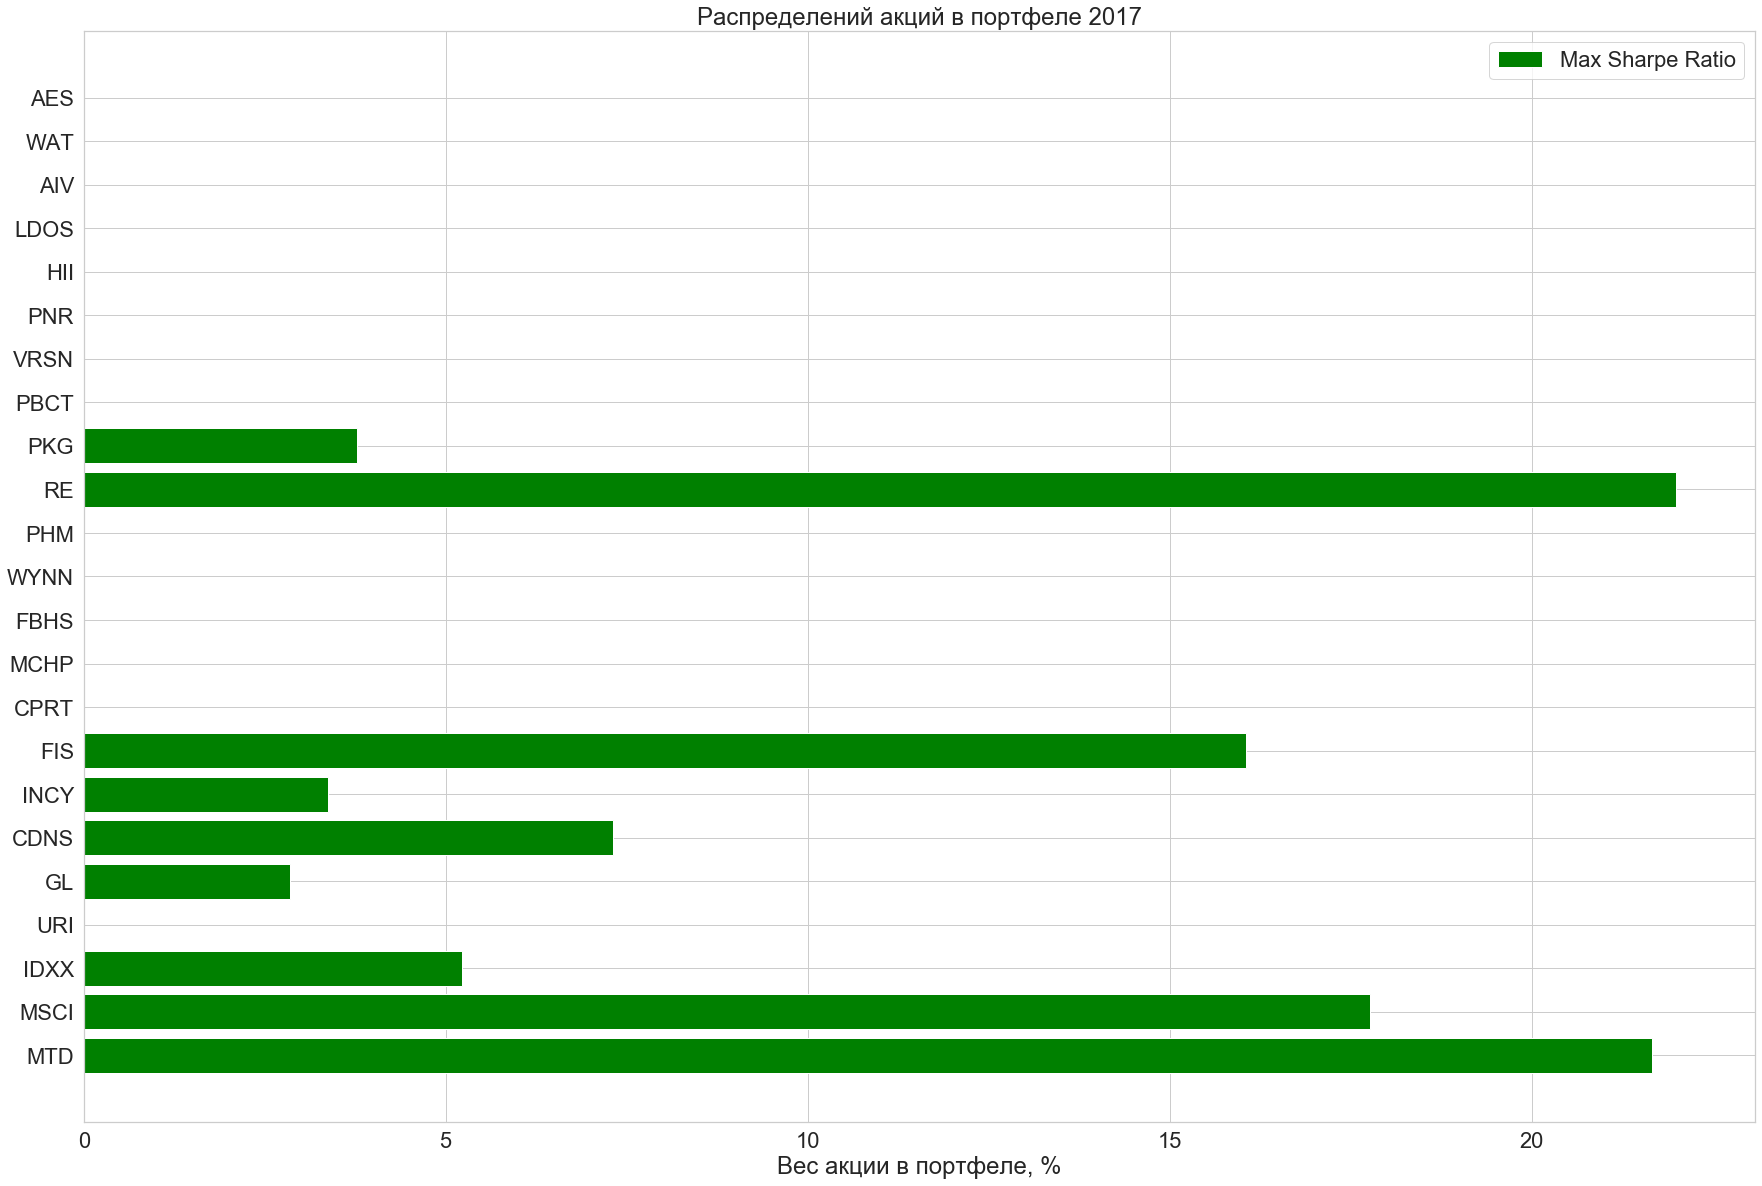

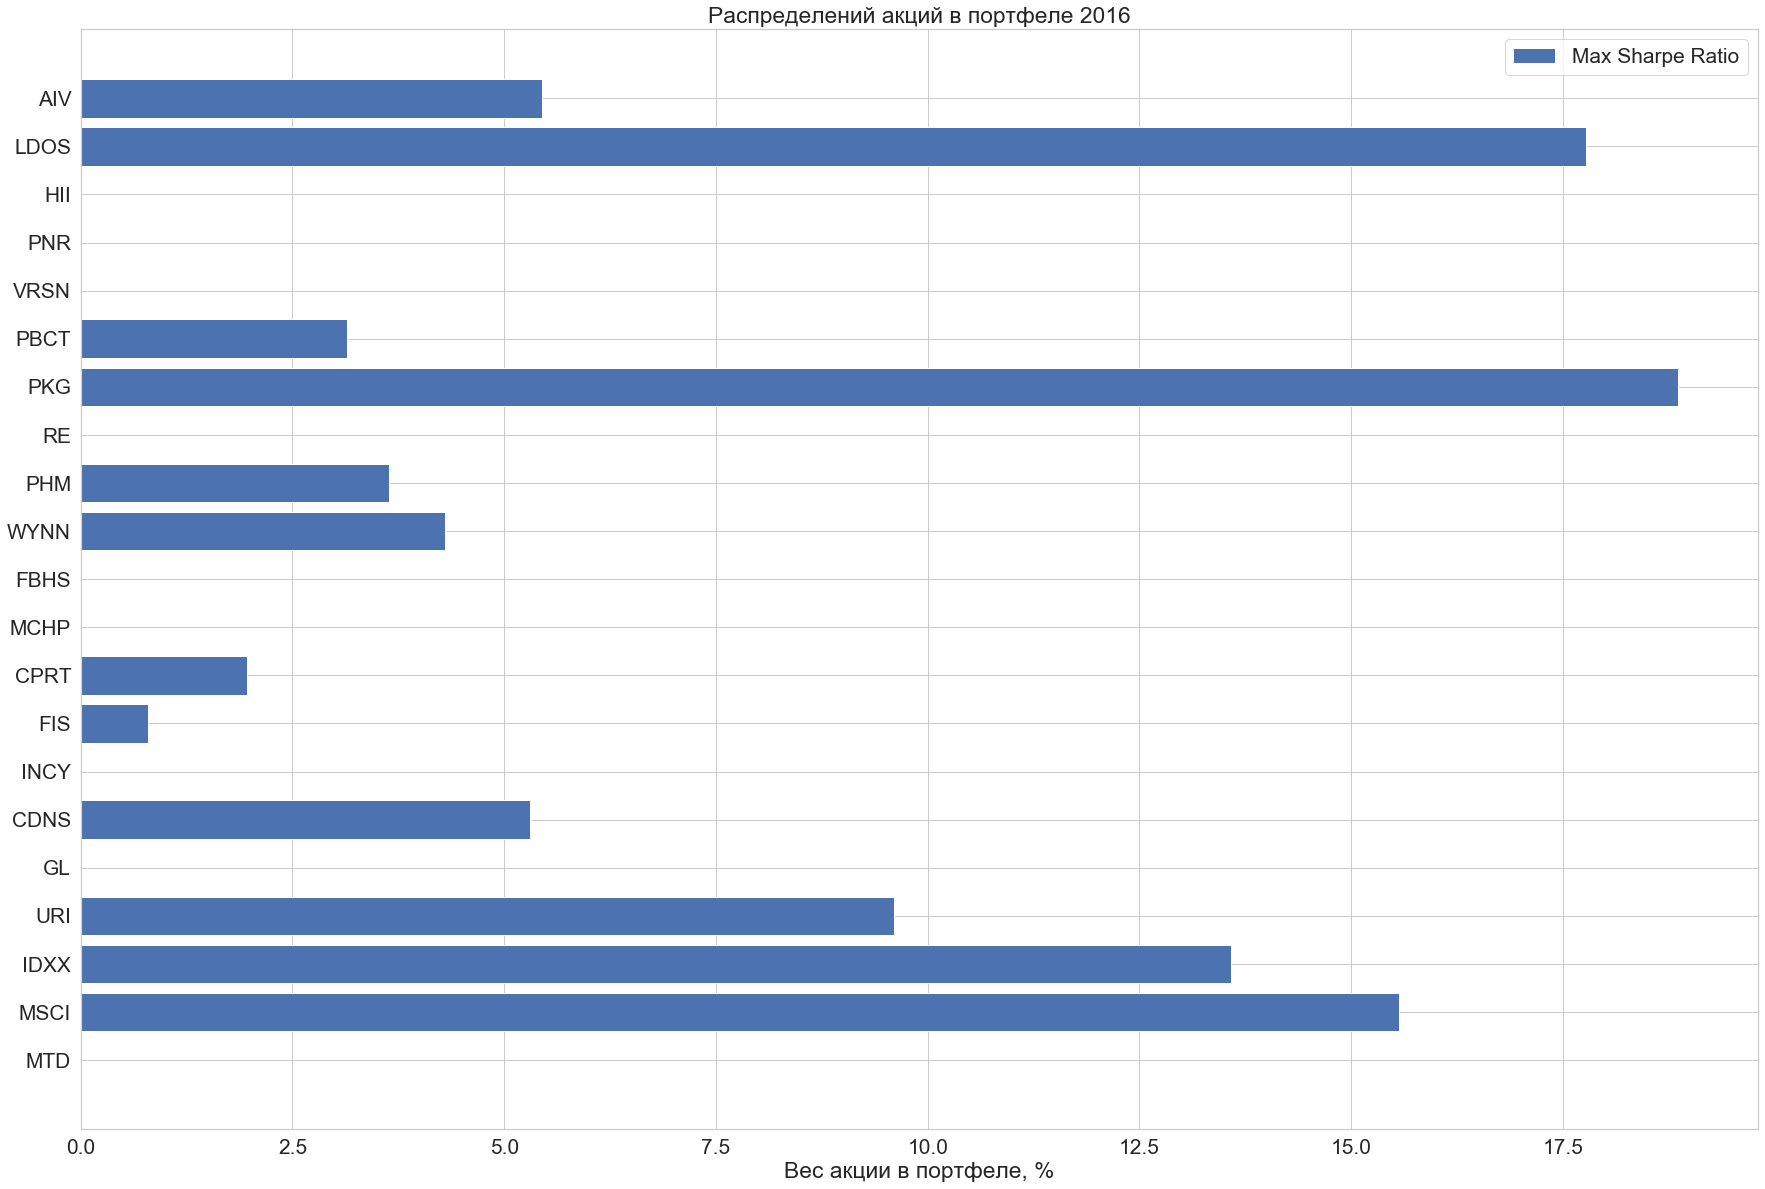

In [30]:
#max_sharpe_res
#min_var_res
#max_ret_res

ind_2016 = np.arange(Assets_table_2016.columns.size)
ind_2017 = np.arange(Assets_table_2017.columns.size)


fig = plt.figure(figsize=(25,17))
sns.set(style="whitegrid", color_codes=True, font_scale = 2)

plt.barh(ind_2017, max_sharpe_res_2017,  align='center', color = 'green', label = 'Max Sharpe Ratio')

plt.xlabel('Вес акции в портфеле, %')
plt.title('Распределений акций в портфеле 2017')
plt.legend(loc = 'best')
plt.yticks(ind_2017, Assets_table_2017.columns)

#plt.barh(ind_2017, min_var_res_2017, align='center', color = 'green')
plt.tight_layout();

fig = plt.figure(figsize=(25,17))
sns.set(style="whitegrid", color_codes=True, font_scale = 1.9)
plt.barh(ind_2016, max_sharpe_res_2016, align='center', label = 'Max Sharpe Ratio')
plt.yticks(ind_2016, Assets_table_2017.columns)
plt.xlabel('Вес акции в портфеле, %')
plt.title('Распределений акций в портфеле 2016')
plt.legend(loc = 'best')
#ax11.barh(ind_2016, min_var_res_2016,  align='center', color = 'green')
plt.tight_layout();

In [31]:
sp = pd.read_csv('SP500.csv')
sp['Date'] = pd.to_datetime(sp['Date'])
sp.set_index('Date', inplace = True)
sp_2016 = sp[['Close']][sp.index.year == 2016]
sp_2017 = sp[['Close']][sp.index.year == 2017]

In [32]:
Assets_table_150.drop(columns = ['ARNC', 'BKR'], inplace = True)

In [33]:
p_ret_half_2016 = p_returns[ (p_returns.index < '2016-07-01') ]

sp_2016_h = sp_2016.pct_change().dropna().rename(columns = {'Close':'returns'})
sp_2016_half_2016 = sp_2016_h[(sp_2016_h.index > '2016-07-01') ]

sp_2016_half_2016 = p_ret_cum[p_ret_cum.index == '2016-06-24'].append(sp_2016_half_2016)

NameError: name 'p_returns' is not defined

In [38]:
import datetime
import dateutil.relativedelta


In [39]:
Assets_table_2016.index

DatetimeIndex(['2013-01-04', '2013-01-11', '2013-01-18', '2013-01-25',
               '2013-02-01', '2013-02-08', '2013-02-15', '2013-02-22',
               '2013-03-01', '2013-03-08',
               ...
               '2020-02-28', '2020-03-06', '2020-03-13', '2020-03-20',
               '2020-03-27', '2020-04-03', '2020-04-09', '2020-04-17',
               '2020-04-24', '2020-05-01'],
              dtype='datetime64[ns]', name='DataDate', length=384, freq=None)

In [42]:

Assets_table_2016.index = [element + dateutil.relativedelta.relativedelta(months=12) for element in Assets_table_2016.index]

In [48]:
sp_2016.index = [element + dateutil.relativedelta.relativedelta(months=12) for element in sp_2016.index]

In [51]:
Assets_table_150.index = [element + dateutil.relativedelta.relativedelta(months=12) for element in Assets_table_150.index]

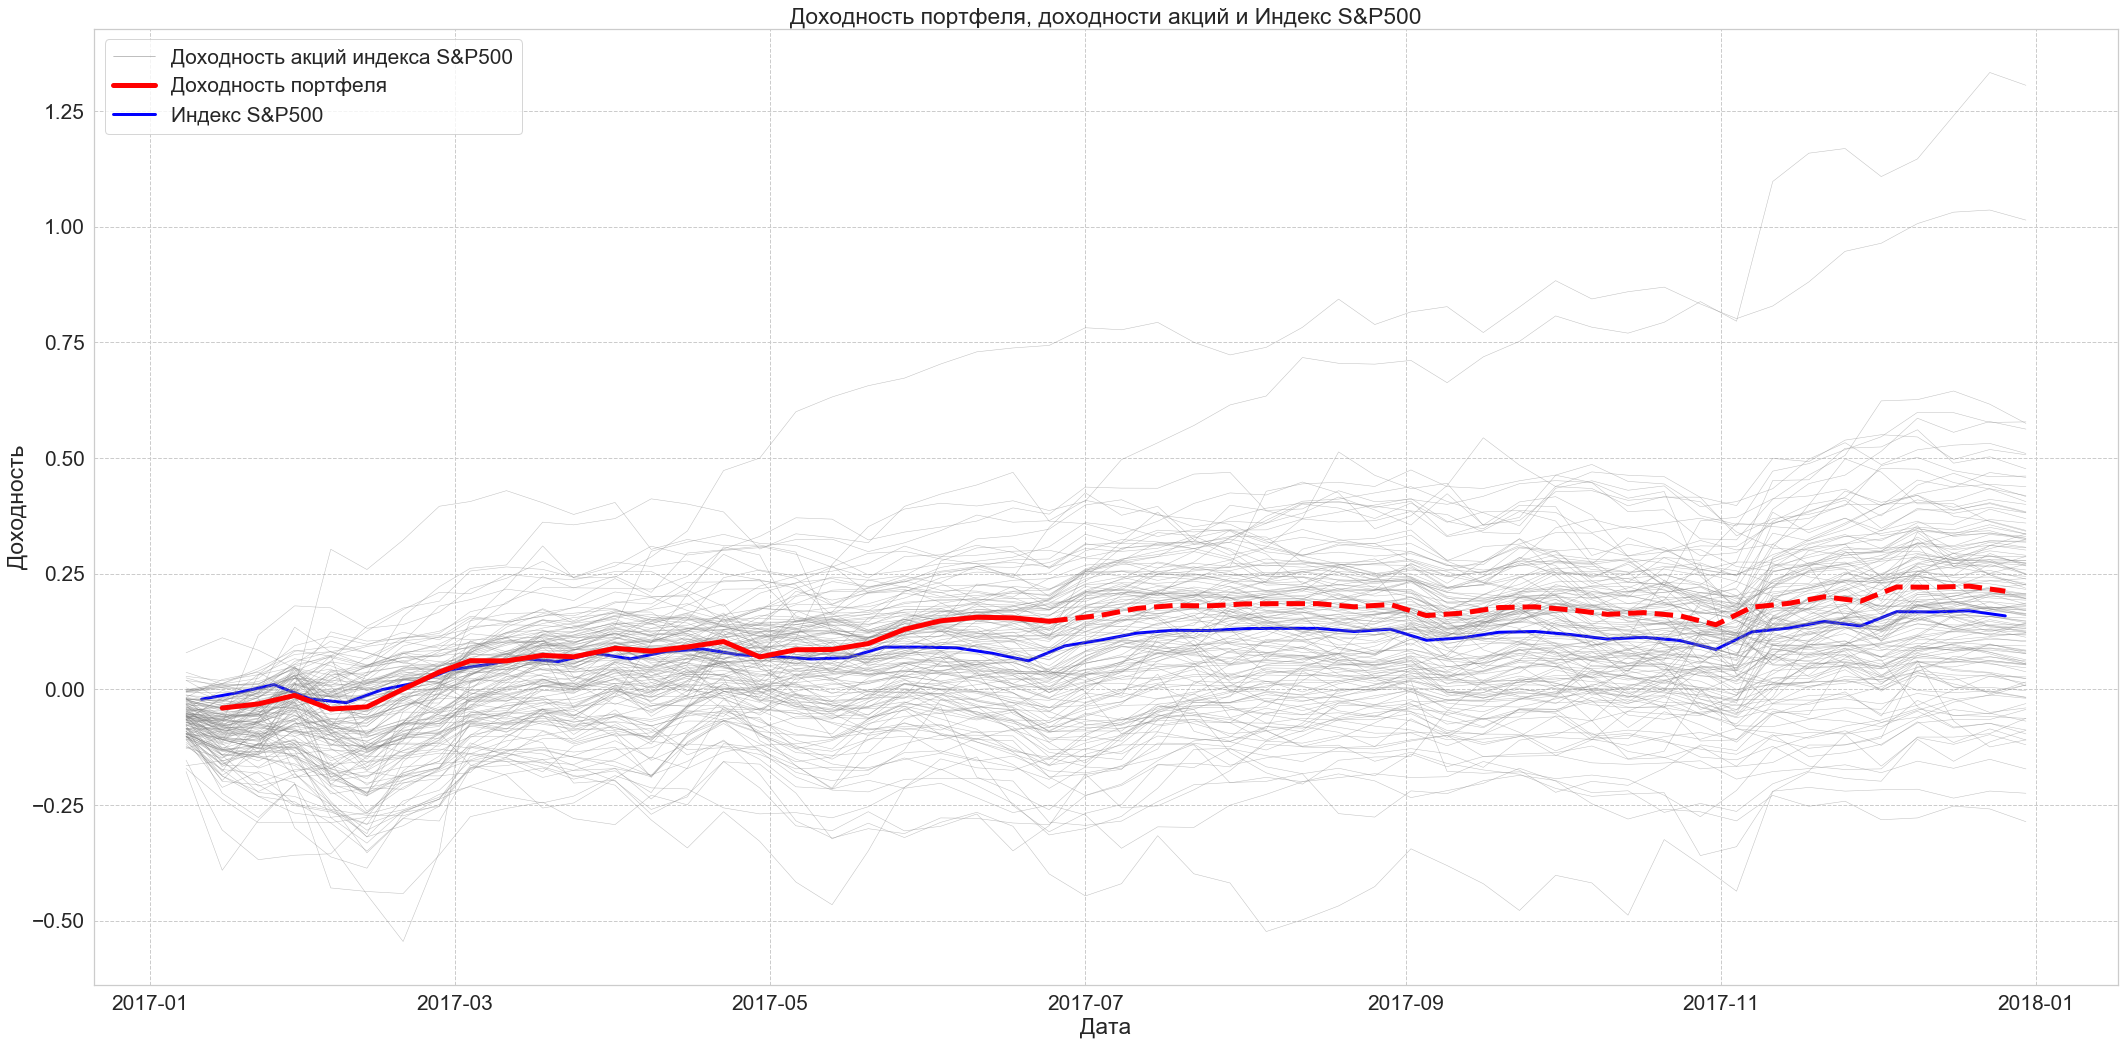

In [52]:
# Построение графика всех акций и доходности конкретного портфеля
portfolio_alloc = max_sharpe_res_2016
#portfolio_alloc = min_var_res
#portfolio_alloc = max_ret_res

index = Assets_table_2016[Assets_table_2016.index.year ==2017].index
p_returns = pd.DataFrame(columns=['returns'])
for month in range(1, Assets_table_2016[Assets_table_2016.index.year ==2017].index.size):
    # Calculating portfolio return
    a_return = Assets_table_2016[Assets_table_2016.index.year ==2017].loc[index[month]]
    p_returns.loc[index[month]] = np.sum(a_return*(portfolio_alloc/100))

p_ret_half_2016 = p_returns[ (p_returns.index < '2017-07-01') ]
sp_2016_h = sp_2016.pct_change().dropna().rename(columns = {'Close':'returns'})
sp_2016_half_2016 = sp_2016_h[(sp_2016_h.index > '2017-07-01') ]
p_ret_cum = p_ret_half_2016.cumsum()
sp_2016_half_2016 = p_ret_cum[p_ret_cum.index == '2017-06-24'].append(sp_2016_half_2016)

plt.figure(figsize=(30,15))
blue_line = mlines.Line2D([], [], color='blue', linewidth=3, label='Индекс S&P500')
plt.plot(sp_2016.pct_change().cumsum(), 'blue', linewidth=3, label='Индекс S&P500')

gray_line = mlines.Line2D([], [], color='gray', linewidth=0.5, label='Доходность акций индекса S&P500')
plt.plot(Assets_table_150[Assets_table_150.index.year ==2017].cumsum(),'gray', linewidth=0.5, alpha=0.5)

red_line = mlines.Line2D([], [], color='red', linewidth=5, label='Доходность портфеля')
plt.plot(p_ret_half_2016.cumsum(), 'red', linewidth=5)

red_line = mlines.Line2D([], [], color='red', linewidth=5, label='Доходность портфеля')
plt.plot(sp_2016_half_2016.cumsum(), '--',color = 'red', linewidth=5)

plt.grid(True, linestyle='--')
plt.title('Доходность портфеля, доходности акций и Индекс S&P500')
plt.xlabel('Дата')
plt.ylabel('Доходность')
plt.legend(handles=[gray_line, red_line, blue_line]) # 
plt.tight_layout();


In [53]:
sp_2017.index = [element + dateutil.relativedelta.relativedelta(months=12) for element in sp_2017.index]
Assets_table_2017.index = [element + dateutil.relativedelta.relativedelta(months=12) for element in Assets_table_2017.index]

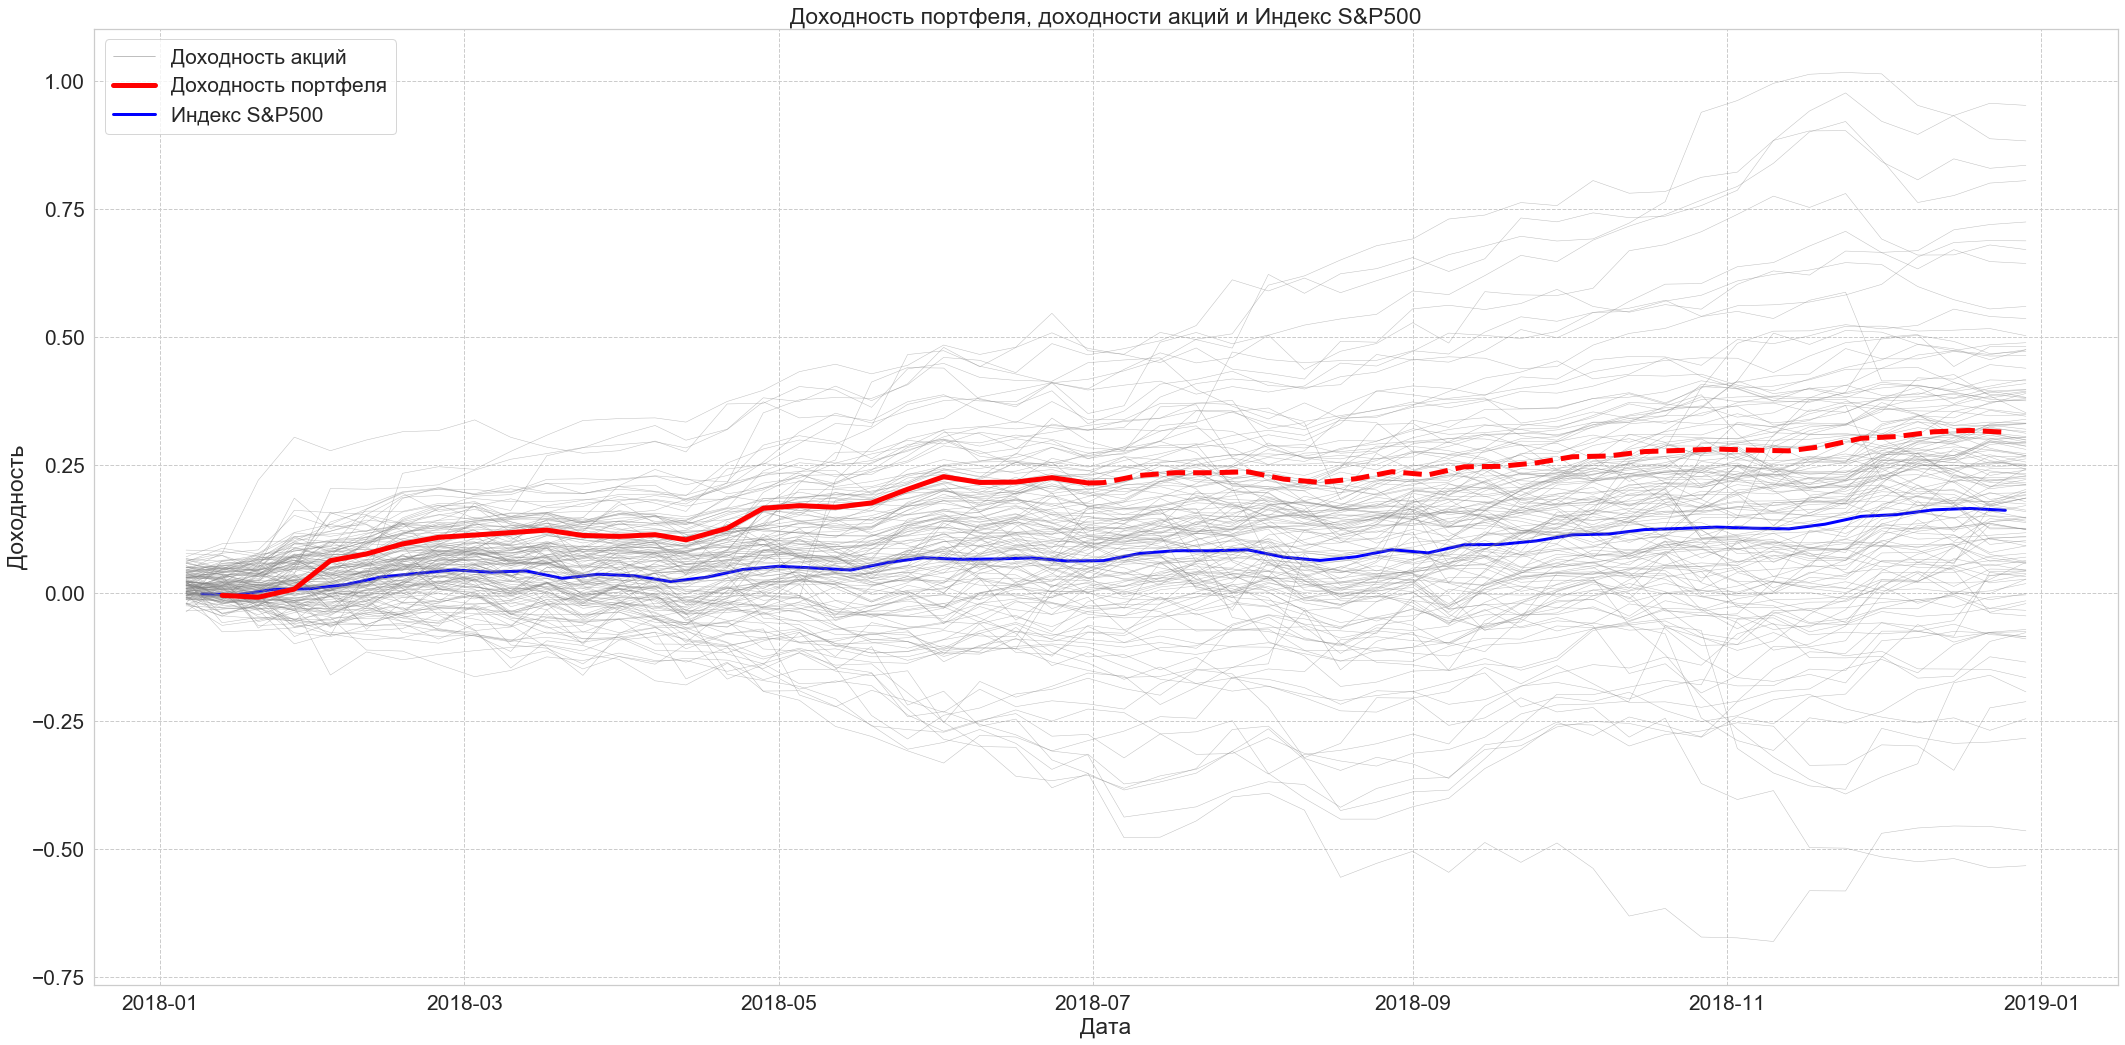

In [54]:
# Построение графика всех акций и доходности конкретного портфеля
portfolio_alloc = max_sharpe_res_2017
#portfolio_alloc = min_var_res
#portfolio_alloc = max_ret_res

index = Assets_table_2017[Assets_table_2017.index.year ==2018].index
p_returns = pd.DataFrame(columns=['returns'])
for month in range(1, Assets_table_2017[Assets_table_2017.index.year ==2018].index.size):
    # Calculating portfolio return
    a_return = Assets_table_2017[Assets_table_2017.index.year ==2018].loc[index[month]]
    p_returns.loc[index[month]] = np.sum(a_return*(portfolio_alloc/100))

p_ret_half_2017 = p_returns[ (p_returns.index < '2018-07-01') ]
sp_2017_h = sp_2017.pct_change().dropna().rename(columns = {'Close':'returns'})
sp_2017_half_2017 = sp_2017_h[(sp_2017_h.index > '2018-07-01') ]
p_ret_cum = p_ret_half_2017.cumsum()
sp_2017_half_2017 = p_ret_cum[p_ret_cum.index == '2018-06-30'].append(sp_2017_half_2017)    
    
plt.figure(figsize=(30,15))
blue_line = mlines.Line2D([], [], color='blue', linewidth=3, label='Индекс S&P500')
plt.plot(sp_2017.pct_change().cumsum(), 'blue', linewidth=3)

gray_line = mlines.Line2D([], [], color='gray', linewidth=0.5, label='Доходность акций')
plt.plot(Assets_table_150[Assets_table_150.index.year ==2018].cumsum(),'gray', linewidth=0.5, alpha=0.5)

red_line = mlines.Line2D([], [], color='red', linewidth=5, label='Доходность портфеля')
plt.plot(p_ret_half_2017.cumsum(), 'red', linewidth=5)

red_line = mlines.Line2D([], [], color='red', linewidth=5, label='Доходность портфеля')
plt.plot(sp_2017_half_2017.cumsum(), '--', color = 'red', linewidth=5)

plt.grid(True, linestyle='--')
plt.title('Доходность портфеля, доходности акций и Индекс S&P500')
plt.xlabel('Дата')
plt.ylabel('Доходность')
plt.legend(handles=[gray_line, red_line, blue_line]) # 
plt.tight_layout();


In [395]:
p = (-max_sharpe_ratio(probability, cov_matrix)['fun'] * 100)/
print('Cредняя годовая доходность портфеля:', str(round(p, 2))+'%')

#im = (imoex.pct_change().cumsum()[-1] * 100)/6
#print('Cредняя годовая доходность индекса Московской Биржи:', str(round(im, 2))+'%')

#print('Cредняя годовая доходность портфеля / индекс Московской Биржи:', round(p/im, 2))

Cредняя годовая доходность портфеля: 72.14%
